In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

'[' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
#importar fastbook
import fastbook as fa
import fastai.vision.widgets

### Modelo

In [3]:
#lista de produtos
products = 'compal maracujá 1L','nesquik chocolate em pó','atum em lata bom petisco', 'iogurte aroma morango mimosa', 'queijo flamengo limiano', 'bolacha maria vieira', 'oreo bolacha original'

In [4]:
#definir path
path=fa.Path("imagens_produtos")

In [5]:
#download das imagens do duckduckgo
if not path.exists():
    path.mkdir()
    for o in products:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = fa.search_images_ddg(f'{o}')
        fa.download_images(dest, urls=results)

In [6]:
#path das imagens descarregadas
fns = fa.get_image_files(path)
fns

(#1246) [Path('imagens_produtos/atum em lata bom petisco/000e0f79-5f45-4331-a46b-2d0bd8a3bb95.jpg'),Path('imagens_produtos/atum em lata bom petisco/00d67e8b-75cc-498e-9271-b1c1a2b6ded5.jpg'),Path('imagens_produtos/atum em lata bom petisco/02514acc-6481-4452-ac59-25a5bfa76a6a.jpg'),Path('imagens_produtos/atum em lata bom petisco/027f1ad4-edb1-4859-afdd-2b23b31c414b.jpg'),Path('imagens_produtos/atum em lata bom petisco/03dfd822-6679-49c2-80c9-ea8640c9c942.jpeg'),Path('imagens_produtos/atum em lata bom petisco/0444929a-5355-48be-913b-b2ddebe72c8e.jpg'),Path('imagens_produtos/atum em lata bom petisco/056ce045-aae5-482f-8cbc-578ac1a3c81d.jpg'),Path('imagens_produtos/atum em lata bom petisco/05c4c277-2fc1-462c-b455-105da3b13fb0.jpg'),Path('imagens_produtos/atum em lata bom petisco/06bf37da-80e2-4c7c-90fa-02fb2c4d7141.jpg'),Path('imagens_produtos/atum em lata bom petisco/07900ef8-4d90-43b7-8449-b9892c9f7158.jpg')...]

In [7]:
#verificar imagens inválidas
failed = fa.verify_images(fns)
failed

(#0) []

In [8]:
#Eliminar imagens inválidas
failed.map(fa.Path.unlink)

(#0) []

In [11]:
#definir product
product = fa.DataBlock(
    blocks=(fa.ImageBlock, fa.CategoryBlock), 
    get_items=fa.get_image_files, 
    splitter=fa.RandomSplitter(valid_pct=0.2, seed=42),
    get_y=fa.parent_label,
    item_tfms=fa.Resize(128))

In [12]:
#transformações das imagens
product = product.new(
    item_tfms=fa.RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=fa.aug_transforms())
dls = product.dataloaders(path)

In [14]:
#aprendizagem do modelo
learn = fa.vision_learner(dls, fa.resnet18, metrics=fa.error_rate)
learn.fine_tune(4)

C:\Users\Miguel Paulo\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Miguel Paulo\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
#exportar o modelo
learn.export(path/'model_produtos.pkl')

In [13]:
# Confusion Matrix
interp = fa.ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

NameError: name 'learn' is not defined

### Testar o modelo

In [14]:
#Importar o modelo
learn_inf = fa.load_learner('model_produtos.pkl')

In [17]:
#Ver as categorias dos produtos
learn_inf.dls.vocab

['atum em lata bom petisco', 'bolacha maria vieira', 'compal maracujá 1L', 'iogurte aroma morango mimosa', 'nesquik chocolate em pó', 'oreo bolacha original', 'queijo flamengo limiano']

In [16]:
#Prever categoria de uma imagem
produto_previsto = learn_inf.predict('Compal.jpg')[0]
print(produto_previsto)


compal maracujá 1L


In [27]:
#definir colunas correspondentes a cada produto previsto
import pandas as pd
precos = pd.read_csv('historico_de_precos.csv', encoding='utf-8')

if produto_previsto == 'atum em lata bom petisco':
    precos_produto_previsto = precos['preco_atum_bompetisco']

if produto_previsto == 'bolacha maria vieira':
    precos_produto_previsto = precos['preco_bolacha_maria']

if produto_previsto == 'compal maracujá 1L':
    precos_produto_previsto = precos['preco_compal_maracuja']

if produto_previsto == 'iogurte aroma morango mimosa':
    precos_produto_previsto = precos['preco_iogurte']

if produto_previsto == 'nesquik chocolate em pó':
    precos_produto_previsto = precos['preco_nesquik']

if produto_previsto == 'oreo bolacha original':
    precos_produto_previsto = precos['preco_oreo']

if produto_previsto == 'queijo flamengo limiano':
    precos_produto_previsto = precos['preco_queijo']


In [28]:
#definir colunas correspondentes a cada produto previsto
import pandas as pd
classificacao = pd.read_csv('classificacao.csv', encoding='utf-8')

if produto_previsto == 'atum em lata bom petisco':
    classificacao_prevista = classificacao['classificacao_atum']

if produto_previsto == 'bolacha maria vieira':
    classificacao_prevista = classificacao['classificacao_bolacha']

if produto_previsto == 'compal maracujá 1L':
    classificacao_prevista = classificacao['classificacao_compal']

if produto_previsto == 'iogurte aroma morango mimosa':
    classificacao_prevista = classificacao['classificacao_iogurte']

if produto_previsto == 'nesquik chocolate em pó':
    classificacao_prevista = classificacao['classificacao_nesquik']

if produto_previsto == 'oreo bolacha original':
    classificacao_prevista = classificacao['classificacao_oreo']

if produto_previsto == 'queijo flamengo limiano':
    classificacao_prevista = classificacao['classificacao_queijo']





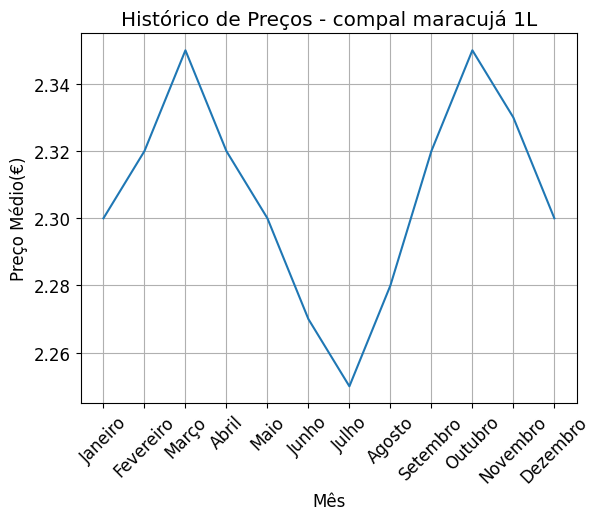

A classificação do produto compal maracujá 1L é 4.6 ⭐


In [29]:
#gráfico + output da classificação
import pandas as pd
import matplotlib.pyplot as plt

meses = precos['mes']

plt.plot(meses, precos_produto_previsto)
plt.xlabel('Mês')
plt.ylabel('Preço Médio(€)')
plt.title('Histórico de Preços - ' + produto_previsto)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

output = f"A classificação do produto {produto_previsto} é {classificacao_prevista.values[0]} \u2B50"
print(output)
